# Trabajo Práctico 2 - Visión por Computadora I

## Filtros - Fourier

### Alumno: Domenje Carlos



### ✒️ Enunciado
Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape-from-focus”

### 💾 Imports de librerias necesarias 


In [1]:

import warnings
warnings.filterwarnings("ignore")
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

### 📟 Implementacion de Filtro Gaussiano

Para la implementación de la función para crear un filtro Gaussiano, haremos uso de la función de OpenCV GaussianBlur, la cual, consultando su documentación debemos pasarle como parametro la matriz de la imagen a la cual queremos aplicar el filtro, el tamaño del kernel y ademas la desviacion estandar podremos obtener la convolucion entre la imagen fuente con el kernel.

Nuestra entrada sera la matriz del mismo tamaño de la imagen con un 1 en el medio, para asi luego obtener el filtro que sera aplicado a las imagenes a testear.

Documentacion OpenCV: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1

In [2]:
# Las entradas de la función son: 
# h: Alto de la imagen
# w: Ancho de la imagen
# k_size: Tamaño del kernel
# sigma: Desviación Standard del filtro
def create_gauss_filter(h, w, k_size:15, sigma:5): 
    # Se crea una matriz de ceros con las dimensiones de la imagen
    rawImg = np.zeros((h, w))
    # En el medio de la imagen seteamos el valor a 1. 
    rawImg[int(h/2),int(w/2)] = 1
    # Aplicamos la funcion de openCV GaussianBlur para asi obtener el filtro deseado.
    # 
    g_filter = cv.GaussianBlur(rawImg, (k_size, k_size), sigma)
    # Calculamos la transformada rapida de Fourier
    g_filter_fft = np.fft.fft2(g_filter)
    # Retornamos el filtro calculado por la funcion GaussianBlur y el filtro en el dominio frecuencial. 
    return g_filter,g_filter_fft

#### 🌌 Carga de imágenes para aplicación de filtro Gaussiano.

Se realiza la lectura de dos imagenes que fueron utilizadas en la clase practica de la materia.

In [3]:
# Cargar imagenes para aplicar filtro gaussiano.
img_chewie = cv.imread('chewbacca.jpg',cv.IMREAD_GRAYSCALE )
img_predator = cv.imread('fft_alfa_pred.png',cv.IMREAD_GRAYSCALE)



# Vemos los tamaños de las imágenes
print(f'Tamaño imagen: {img_chewie.shape} pix')
print(f'Tamaño imagen: {img_predator.shape} pix')




Tamaño imagen: (756, 1200) pix
Tamaño imagen: (698, 341) pix


#### 💻 Aplicación de filtro Gaussiano variando parametros. - Visualización de resultados.

Se grafican diferentes aplicaciones de los filtro en ambas imagenes variando los paramentros de sigma y tamaño del kernel.

#### Imagen Chewie - Kernel_size = 15 - Sigma = 5

<Figure size 640x480 with 0 Axes>

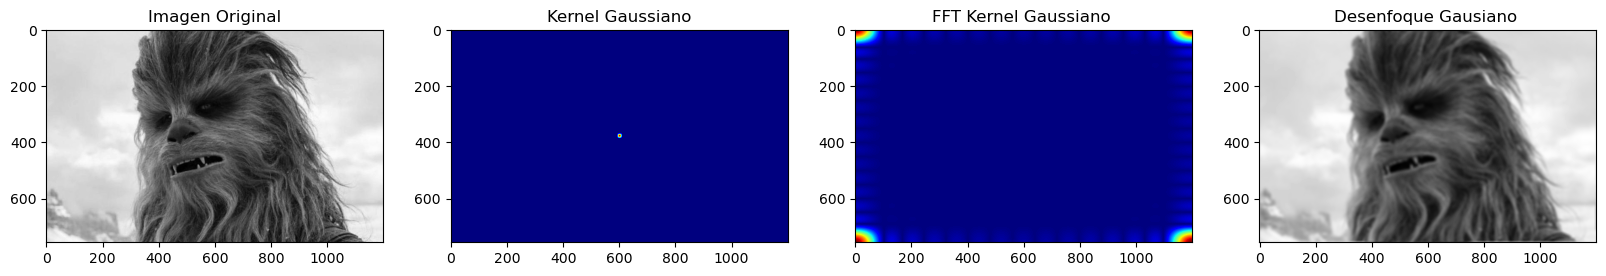

In [4]:
kernel_chewie, fft_kernel_chewie = create_gauss_filter(img_chewie.shape[0],img_chewie.shape[1], 15, 5)

plt.figure()
fig, splt = plt.subplots(1,4,figsize=(20,20)) 

splt[0].imshow(img_chewie, cmap='gray'),   
splt[0].set_title('Imagen Original')

splt[1].imshow(kernel_chewie,cmap='jet'),   
splt[1].set_title('Kernel Gaussiano')

splt[2].imshow(np.abs(fft_kernel_chewie), cmap='jet'),
splt[2].set_title('FFT Kernel Gaussiano ')  

# Aplicamos el filtro a la imagen y la mostramos.
ch_fft = np.fft.fft2(img_chewie)
chewie_filter = ch_fft * fft_kernel_chewie
chewie_filtered = np.fft.ifftshift(np.real(np.fft.ifft2(chewie_filter)))

splt[3].imshow(chewie_filtered,cmap='gray'),
splt[3].set_title('Desenfoque Gausiano ')  

plt.show()



#### Testing con imagen de Depredador. K_size = 15 - sigma = 5

<Figure size 640x480 with 0 Axes>

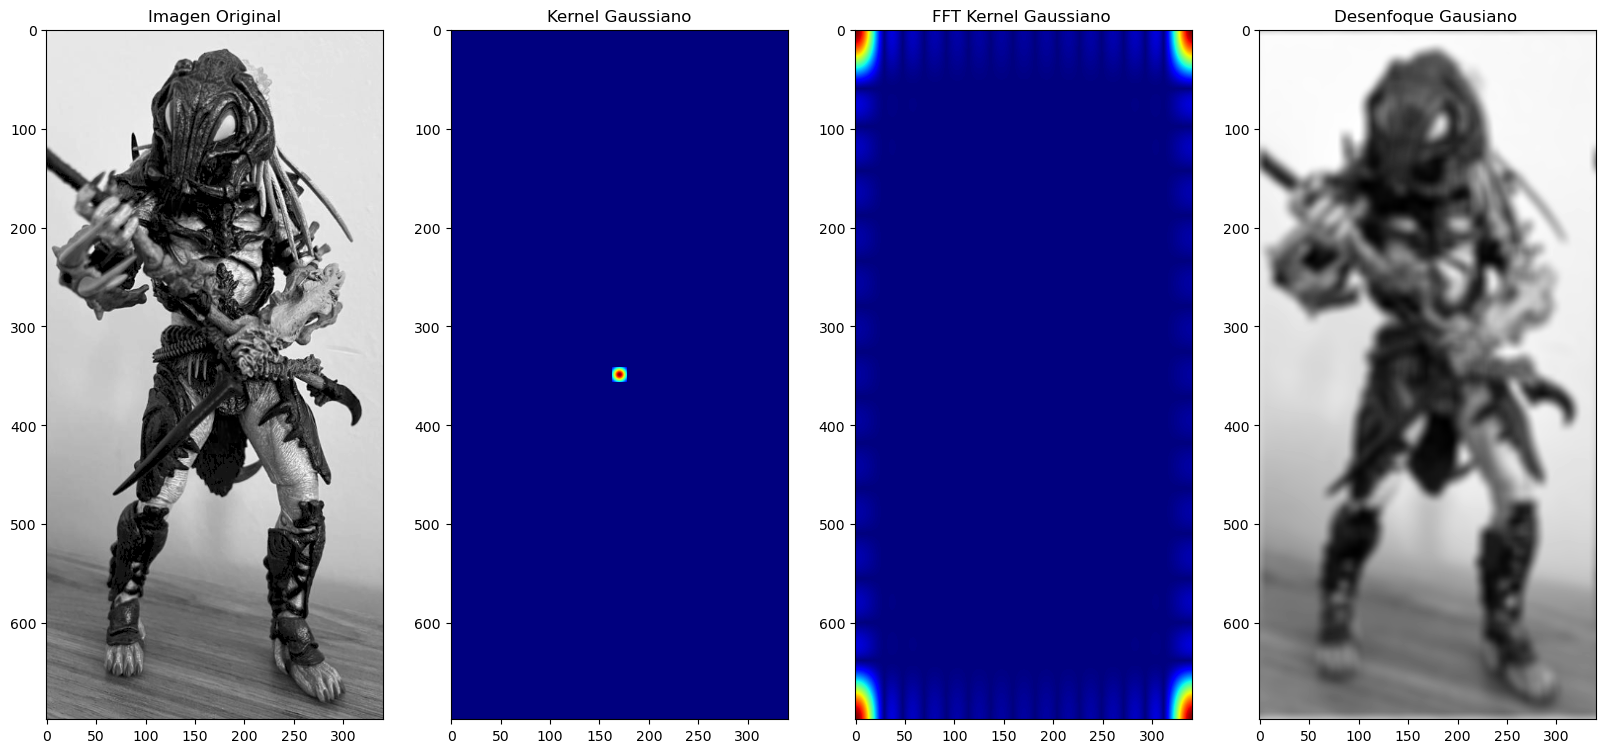

In [5]:
kernel_preda, fft_kernel_preda = create_gauss_filter(img_predator.shape[0],img_predator.shape[1], 15, 5)

plt.figure()
fig, splt = plt.subplots(1,4,figsize=(20,20)) 

splt[0].imshow(img_predator, cmap='gray'),   
splt[0].set_title('Imagen Original')

splt[1].imshow(kernel_preda,cmap='jet'),   
splt[1].set_title('Kernel Gaussiano')

splt[2].imshow(np.abs(fft_kernel_preda), cmap='jet'),
splt[2].set_title('FFT Kernel Gaussiano ')  

# Aplicamos el filtro a la imagen y la mostramos.
ch_fft = np.fft.fft2(img_predator)
predator_filter = ch_fft * fft_kernel_preda
predator_filtered = np.fft.ifftshift(np.real(np.fft.ifft2(predator_filter)))

splt[3].imshow(predator_filtered,cmap='gray'),
splt[3].set_title('Desenfoque Gausiano ')  

plt.show()

### Funcion para ingresar un valor de tamaño de kernel y sigma

Se implementa una funcion para mostrar las dos figuras con valores de k y sigma diferentes.

In [6]:
def show_filter_images(k_size, sigma):
    kernel_preda, fft_kernel_preda = create_gauss_filter(img_predator.shape[0],img_predator.shape[1], k_size, sigma)

    kernel_chew, fft_kernel_chew = create_gauss_filter(img_chewie.shape[0],img_chewie.shape[1], k_size, sigma)

    plt.figure()
    fig, splt = plt.subplots(2,4,figsize=(20,20)) 

    splt[0,0].imshow(img_predator, cmap='gray'),   
    splt[0,0].set_title('Imagen Original')

    splt[0,1].imshow(kernel_preda,cmap='jet'),   
    splt[0,1].set_title('Kernel Gaussiano')

    splt[0,2].imshow(np.abs(fft_kernel_preda), cmap='jet'),
    splt[0,2].set_title('FFT Kernel Gaussiano ')  

    # Aplicamos el filtro a la imagen y la mostramos.
    ch_fft = np.fft.fft2(img_predator)
    predator_filter = ch_fft * fft_kernel_preda
    predator_filtered = np.fft.ifftshift(np.real(np.fft.ifft2(predator_filter)))
    splt[0,3].imshow(predator_filtered,cmap='gray'),
    splt[0,3].set_title('Desenfoque Gausiano ') 
    
    #############################################################################
    #############################################################################
    
    splt[1,0].imshow(img_chewie, cmap='gray'),   
    splt[1,0].set_title('Imagen Original')

    splt[1,1].imshow(kernel_chew,cmap='jet'),   
    splt[1,1].set_title('Kernel Gaussiano')

    splt[1,2].imshow(np.abs(fft_kernel_chew), cmap='jet'),
    splt[1,2].set_title('FFT Kernel Gaussiano ')  

    # Aplicamos el filtro a la imagen y la mostramos.
    ch_fft = np.fft.fft2(img_chewie)
    chew_filter = ch_fft * fft_kernel_chew
    chew_filtered = np.fft.ifftshift(np.real(np.fft.ifft2(chew_filter)))

    splt[1,3].imshow(chew_filtered,cmap='gray'),
    splt[1,3].set_title('Desenfoque Gausiano ') 

    plt.show()

#### Testing para Ambas imagenes - K = 9 , Sigma = 7.5

<Figure size 640x480 with 0 Axes>

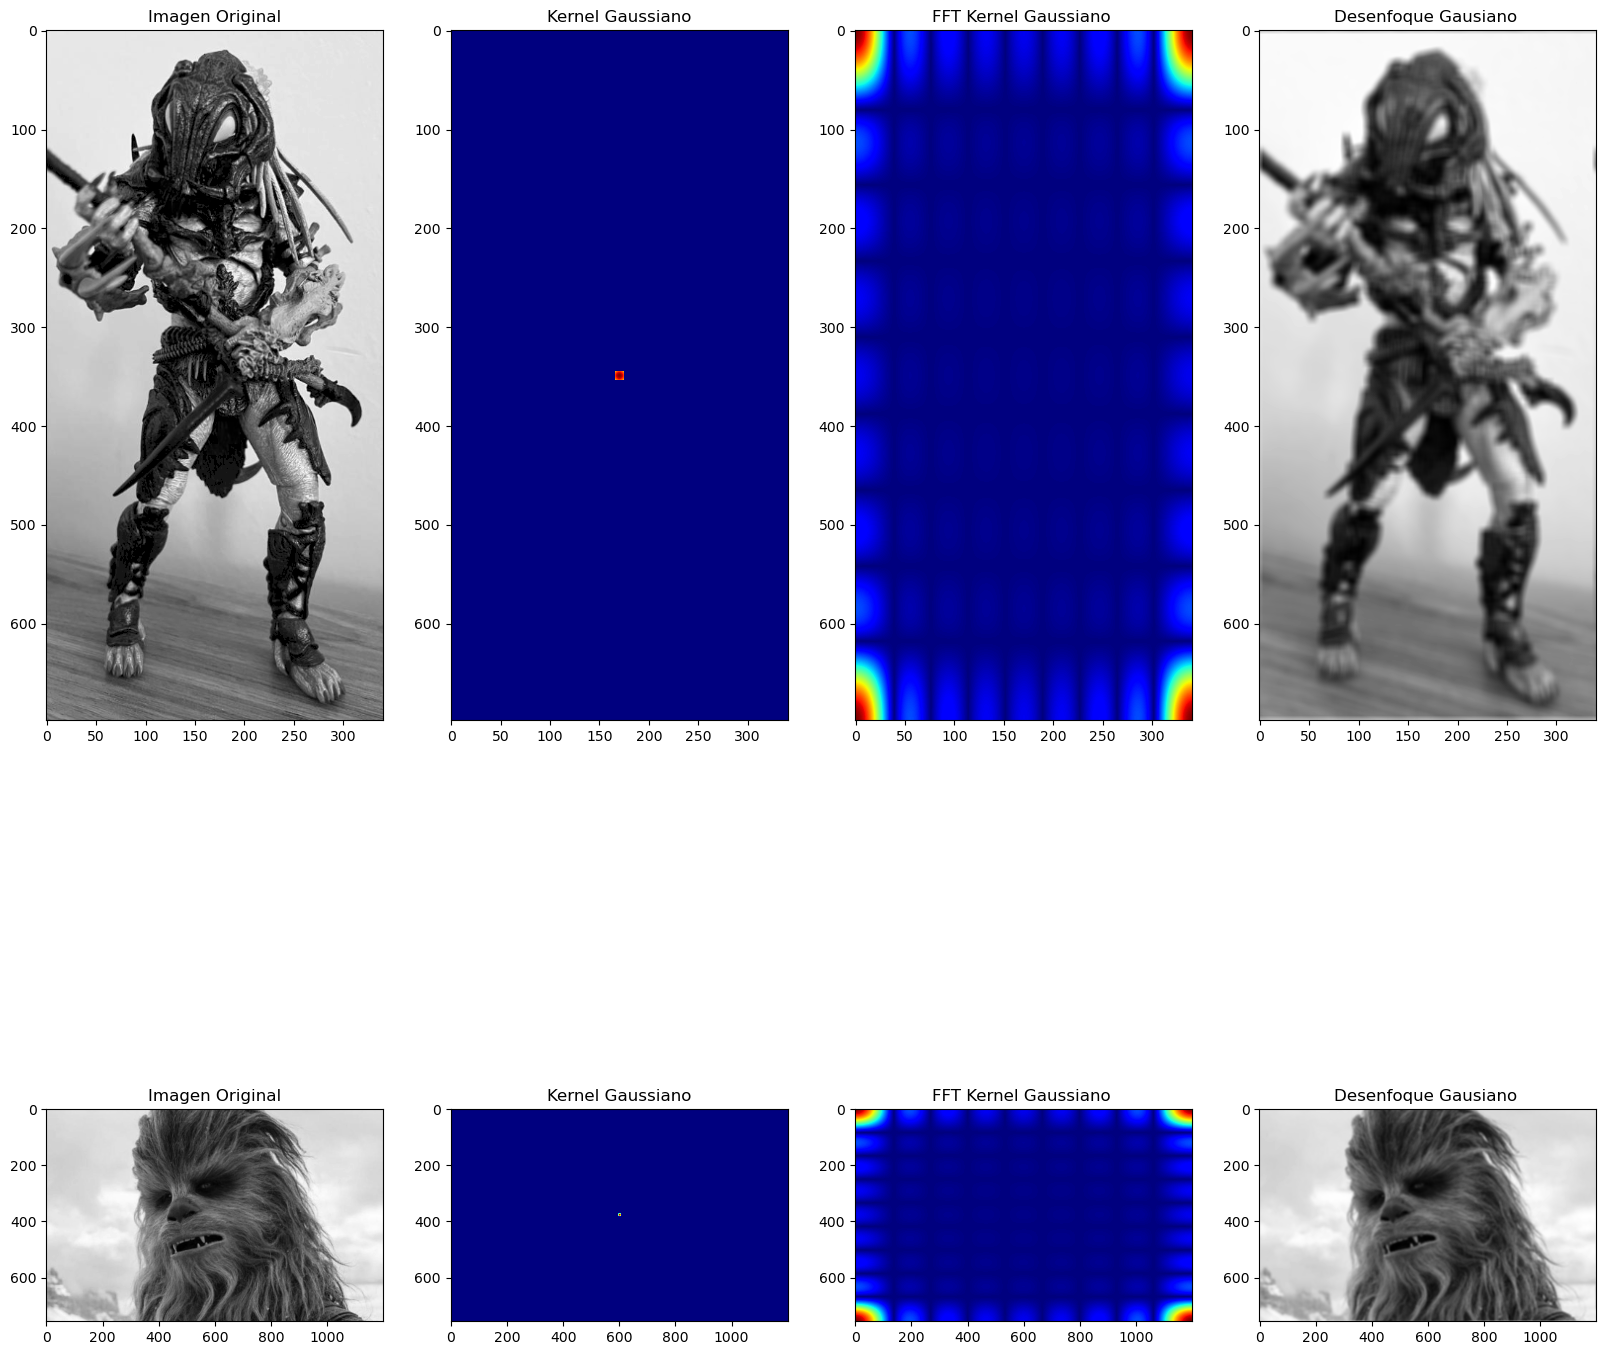

In [7]:
show_filter_images(9,7.5)

#### K_size = 3 - Sigma = 2

<Figure size 640x480 with 0 Axes>

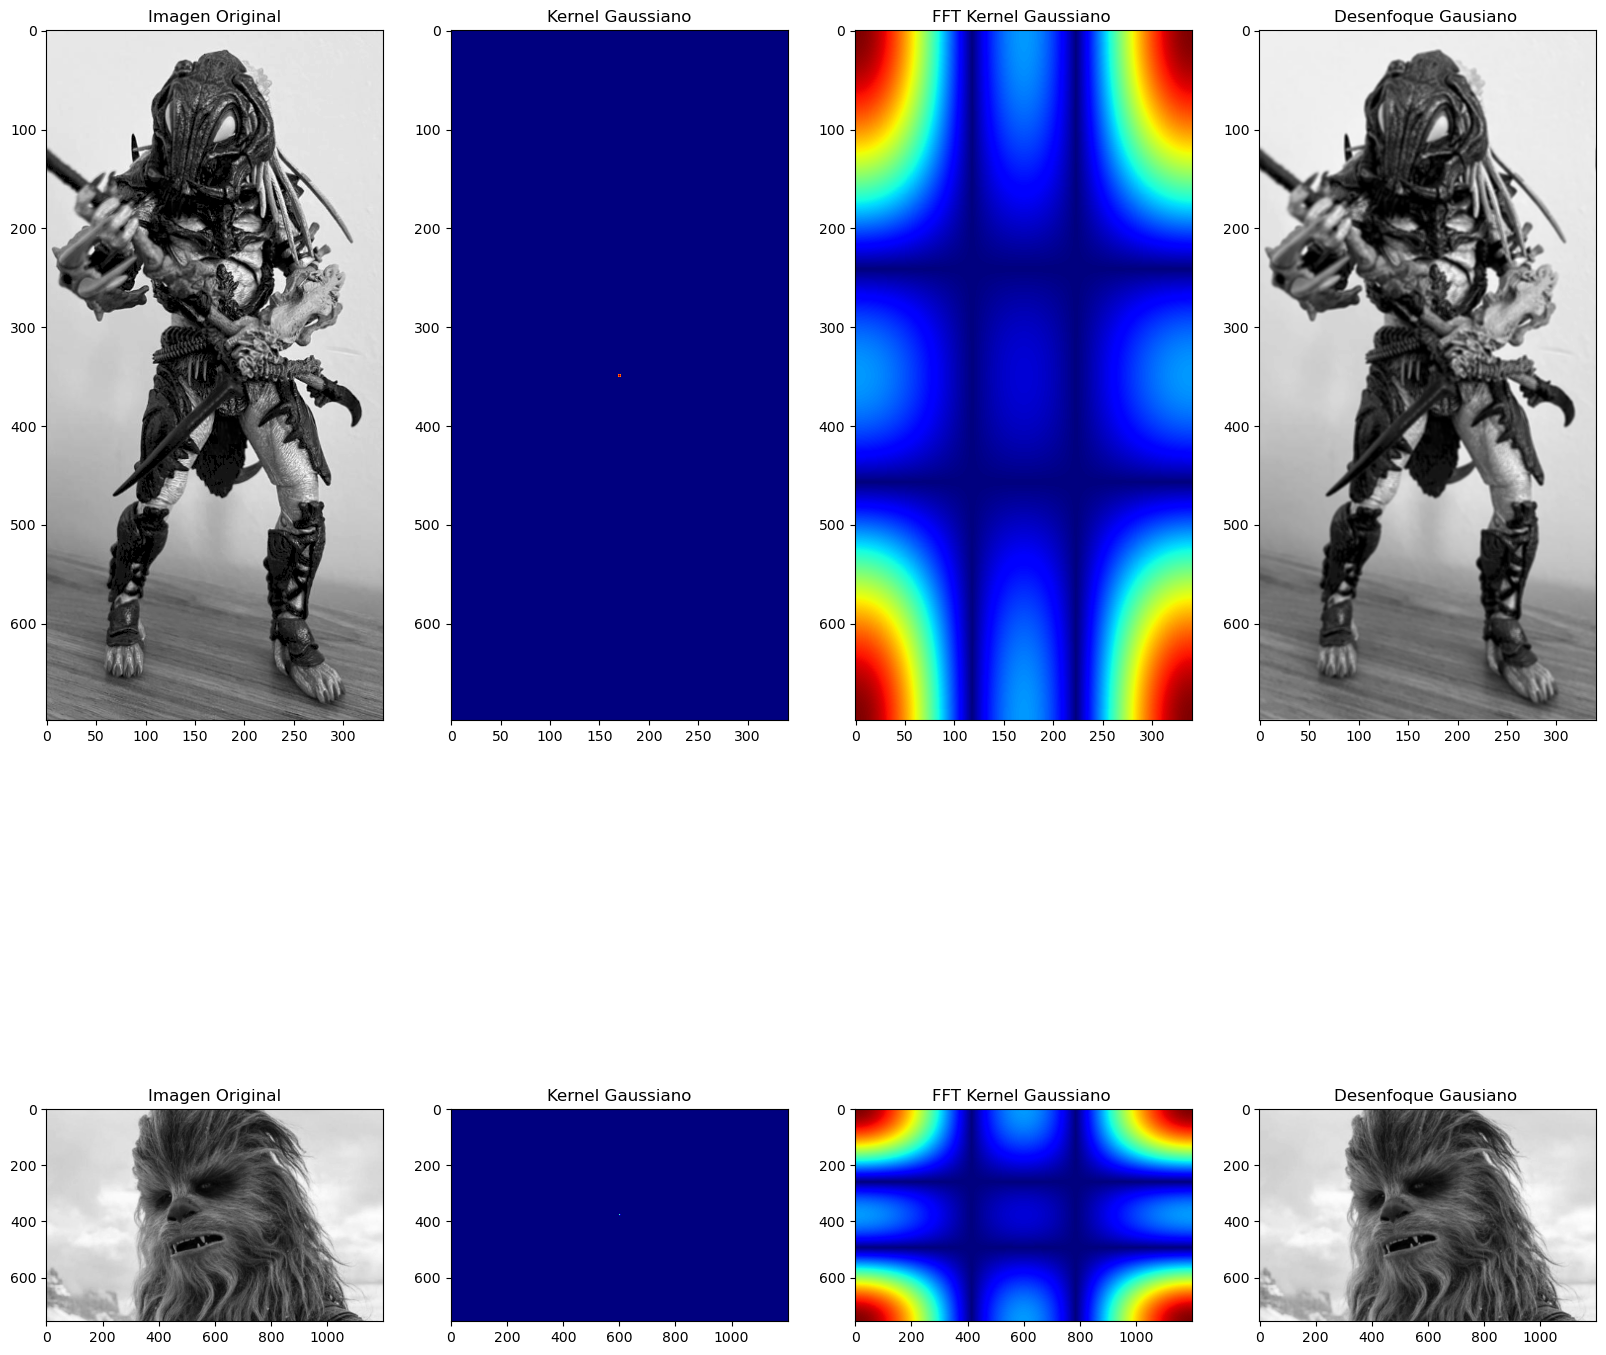

In [8]:
show_filter_images(3,2)

#### K_Size = 25 - Sigma = 21

<Figure size 640x480 with 0 Axes>

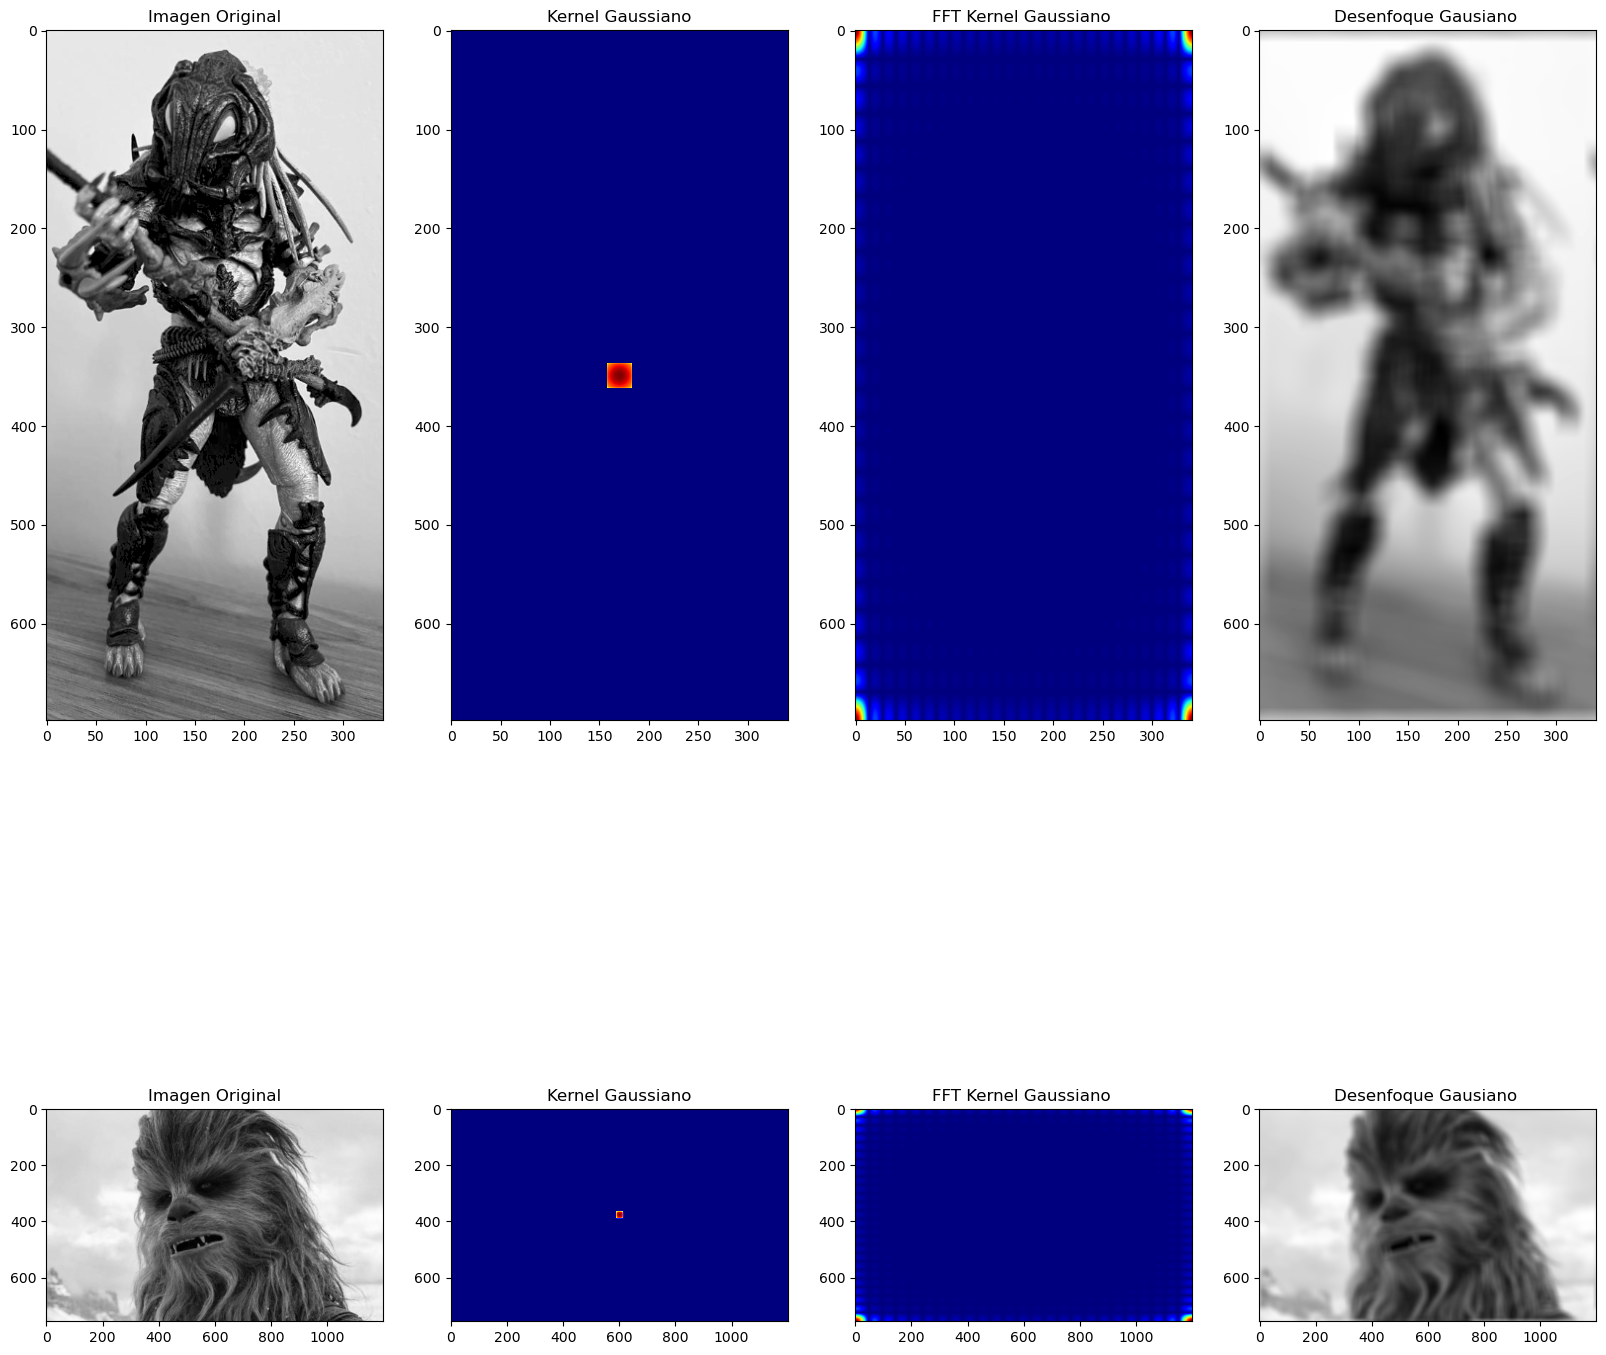

In [9]:
show_filter_images(25,21)

#### K_size = 5 - Sigma = 5

<Figure size 640x480 with 0 Axes>

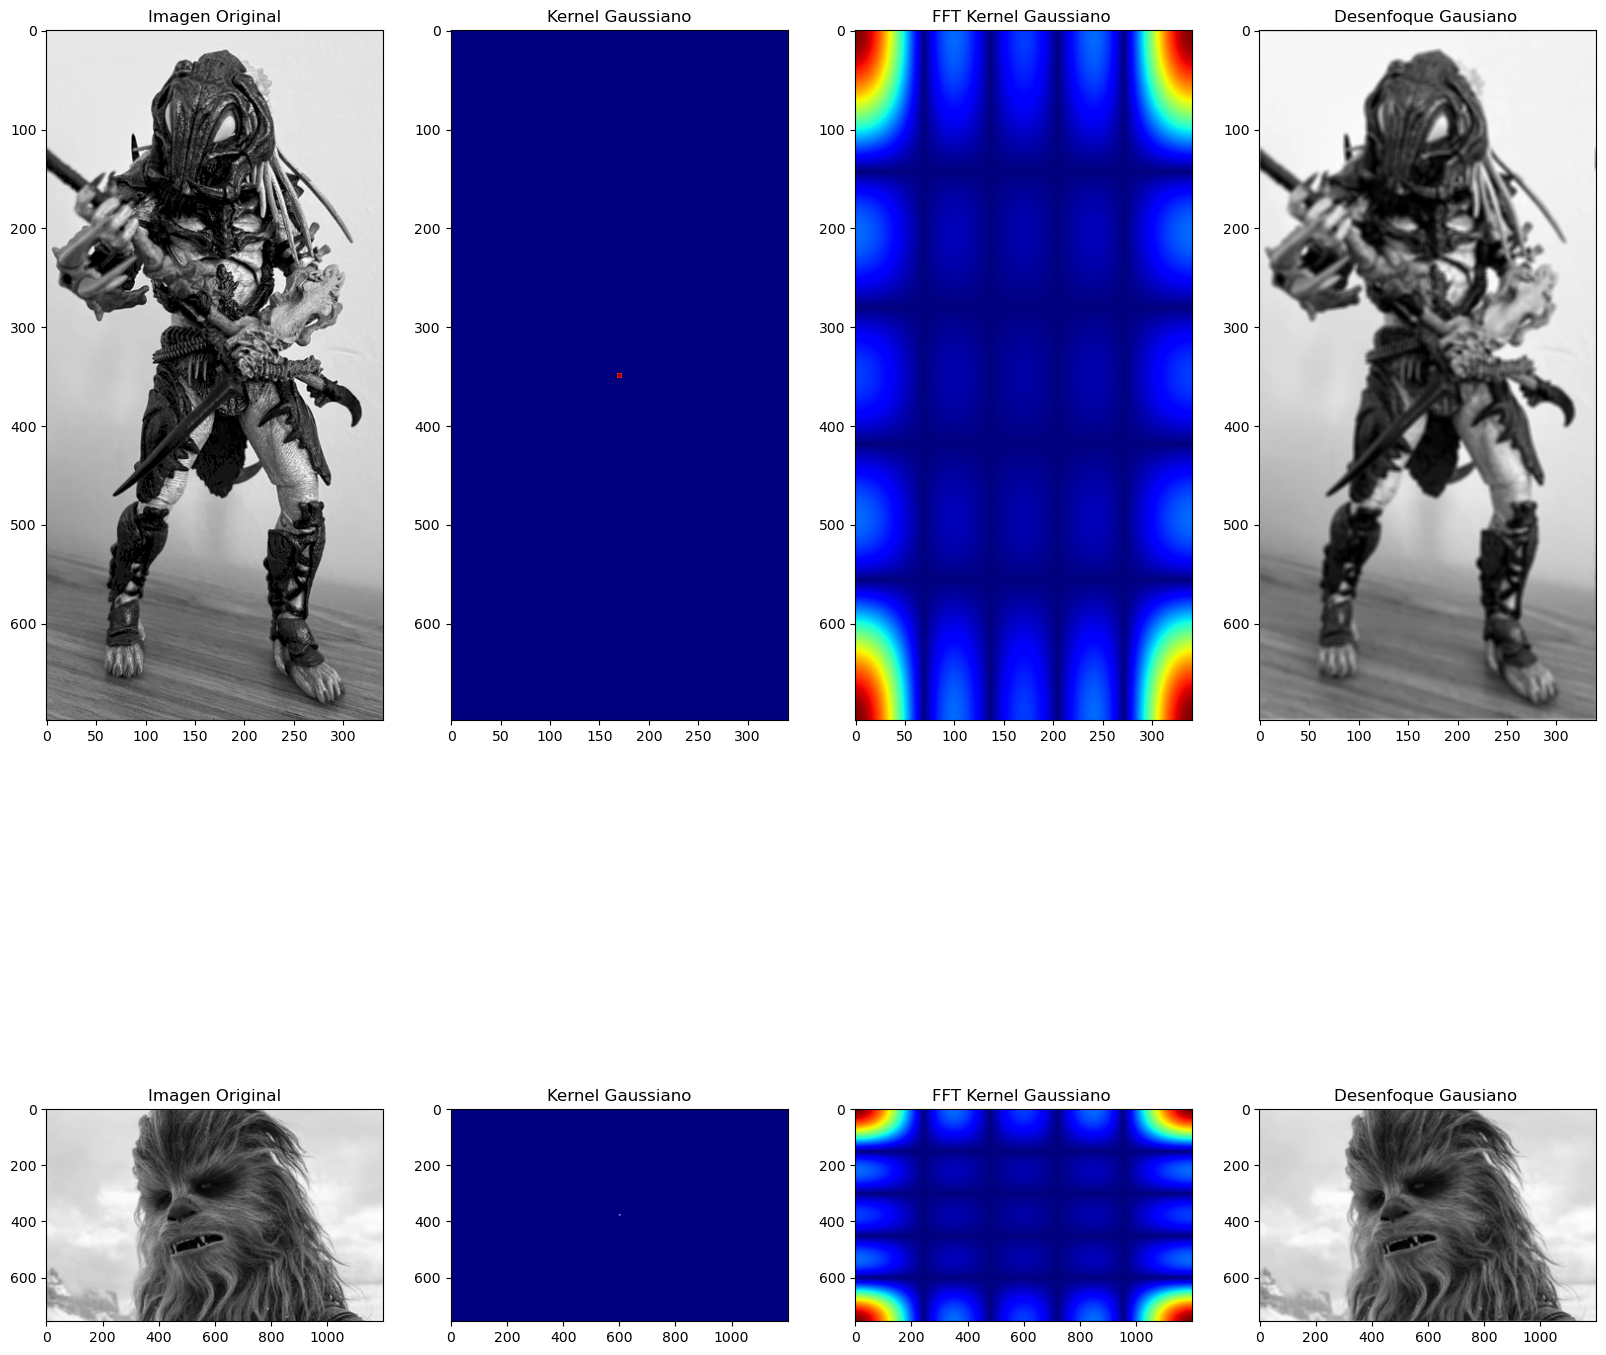

In [10]:
show_filter_images(5,5)

### 📊 Conclusión

Se pudo implementar el filtro graussiano y obtener resultados satisfactorios comparado con lo visto en clases y en la practica. Se puede comprobar que se puede trabajar en el dominio frecuencial realizando simples multiplicaciones entre imagen y filtro y asi evitar realizar convoluciones que son operaciones mas costosas y complejas. 


#### 📁 Image Sharpness Measure for Blurred Images in Frequency Domain

Se realizará la implementacion utilizada en el paper con el fin de poder comparar el resultado de un filtrado por convolución con el filtrado espectral.

**```Algorithm for image quality measure```**
 
**Input:** Image I of size M×N.  
 
**Output:** Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure 
 
**Step 1:** Compute F which is the Fourier Transform representation of image I   
 
**Step 2:**  Find Fc which is obtained by shifting the origin of F to centre. 
 
**Step 3:** Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I. 
 
**Step 4:**  Calculate M = max (AF) where M is the maximum value of the frequency component in F. 
 
**Step 5:** Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000. 
 
**Step 6:** Calculate Image Quality measure (FM) from equation FM = Th / (M x N)


In [11]:
def image_quality_ms(input_img):
    # Step 1
    F = np.fft.fft2(input_img)
    # Step 2
    Fc =np.fft.ifftshift(np.real(np.fft.ifft2(F)))
    # Step 3
    AF =np.abs( Fc )
    # Step 4
    M = np.max(AF)
    # Step 5
    TH = np.count_nonzero((F > (M/1000)))
    # Step 6
    return (TH / (input_img.shape[0] * input_img.shape[1]))


#### Analisis comparativo para el Depredador

<Figure size 640x480 with 0 Axes>

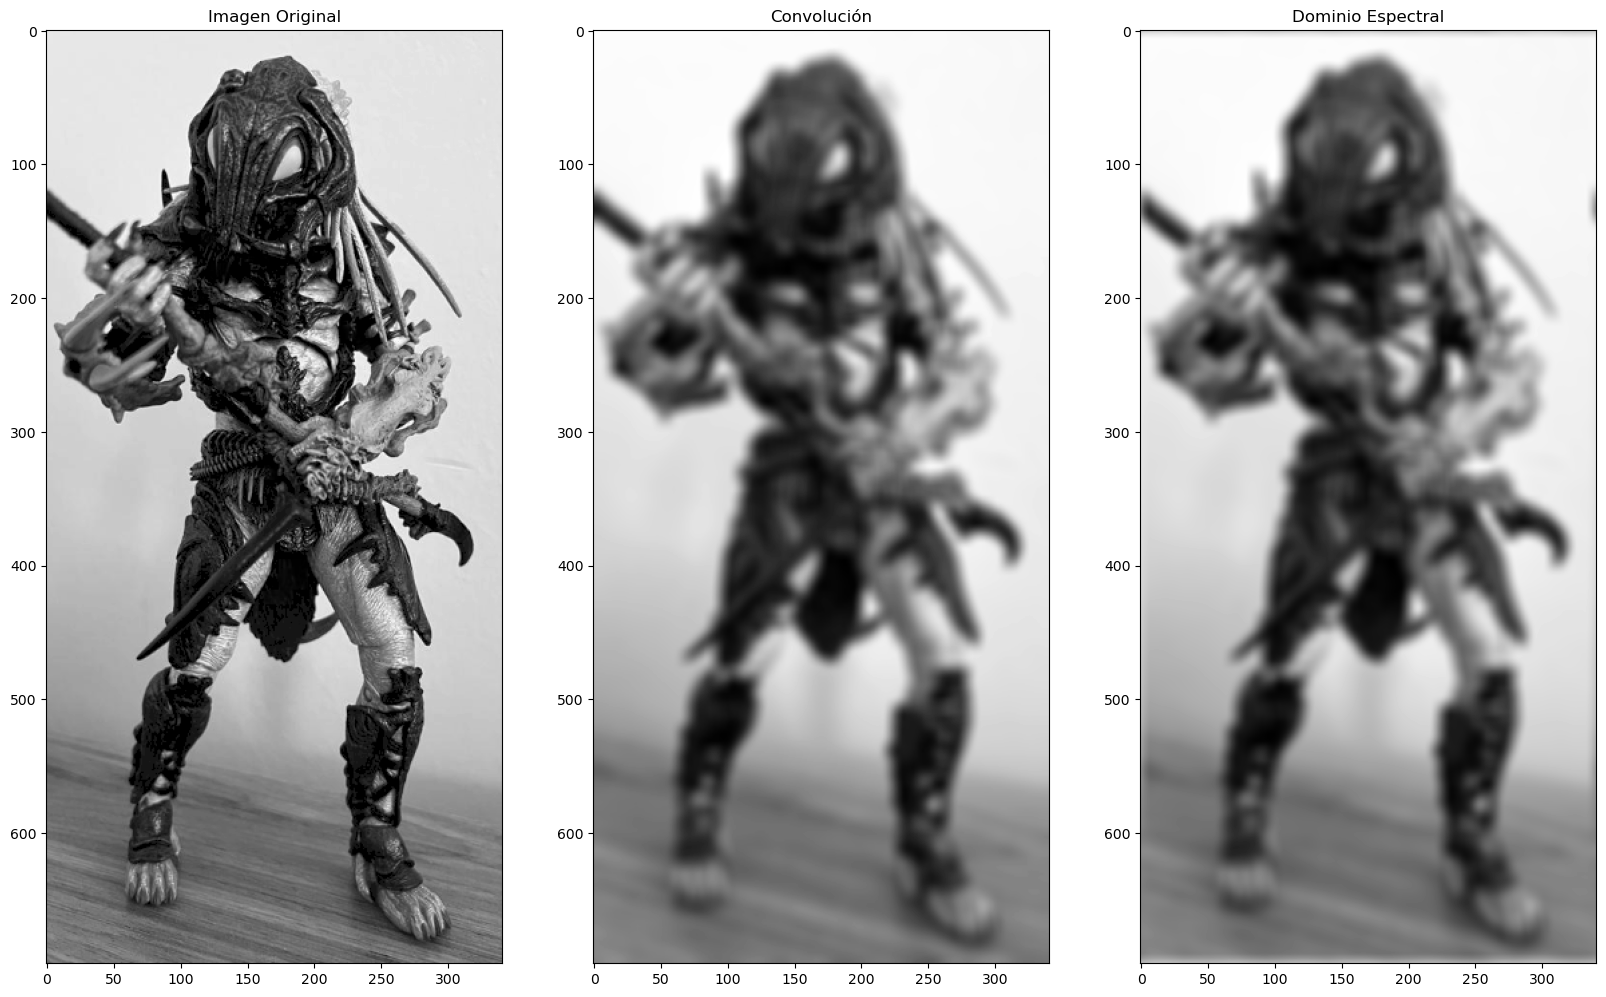

In [12]:
predator_convol = cv.GaussianBlur(img_predator, (15, 15), 5)

predator_g_filter, predator_g_filter_fft = create_gauss_filter(img_predator.shape[0], img_predator.shape[1], 15, 5)

plt.figure()
fig, splt = plt.subplots(1,3,figsize=(20,20)) 

splt[0].imshow(img_predator, cmap='gray'),   
splt[0].set_title('Imagen Original')

splt[1].imshow(predator_convol,cmap='gray'),   
splt[1].set_title('Convolución')

# Calculamos la fft a la imagen y multiplicamos por el filtro.
pr_fft = np.fft.fft2(img_predator)
predator_filter = pr_fft * predator_g_filter_fft
predator_filtered = np.fft.ifftshift(np.real(np.fft.ifft2(predator_filter)))
splt[2].imshow(predator_filtered,cmap='gray'),
splt[2].set_title('Dominio Espectral') 

plt.show()

In [13]:
# Comparamos los resultados obtenidos

convolution_quality = image_quality_ms(predator_convol)

fft_quality = image_quality_ms(predator_filtered)

print(f'Indice de Calidad aplicando CONVOLUCION = {convolution_quality}')
print(f'Indice de Calidad aplicando MULTIPLICACION en dominio espectral = {fft_quality}')

Indice de Calidad aplicando CONVOLUCION = 0.49255098353906007
Indice de Calidad aplicando MULTIPLICACION en dominio espectral = 0.40807417926375317


#### Analisis comparativo para Chewbacca

<Figure size 640x480 with 0 Axes>

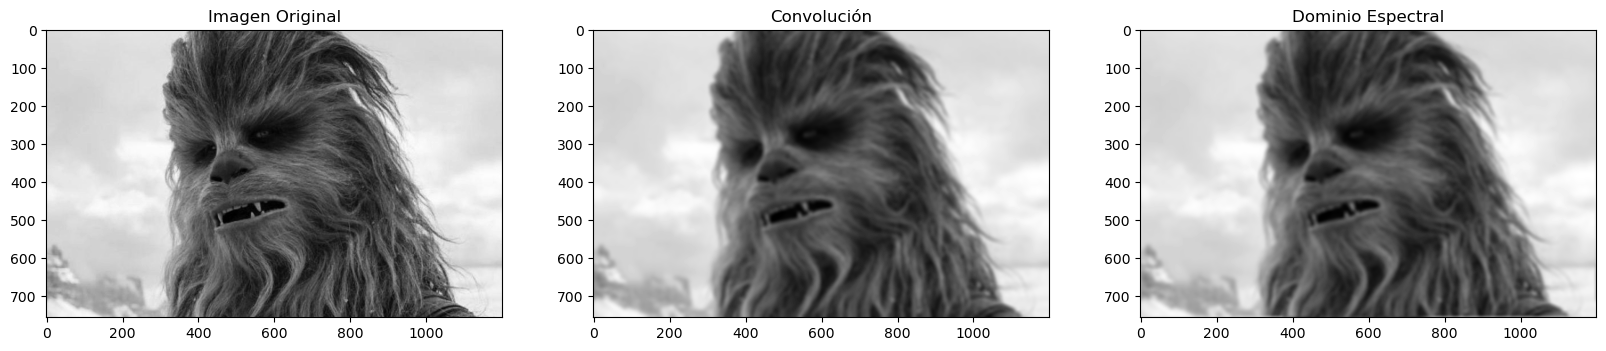

In [14]:
chewie_convol = cv.GaussianBlur(img_chewie, (15, 15), 5)

chewie_g, chewie_g_fft = create_gauss_filter(img_chewie.shape[0], img_chewie.shape[1], 15, 5)

plt.figure()
fig, splt = plt.subplots(1,3,figsize=(20,20)) 

splt[0].imshow(img_chewie, cmap='gray'),   
splt[0].set_title('Imagen Original')

splt[1].imshow(chewie_convol,cmap='gray'),   
splt[1].set_title('Convolución')

# Calculamos la fft a la imagen y multiplicamos por el filtro.
cw_fft = np.fft.fft2(img_chewie)
chewie_filter = cw_fft * chewie_g_fft
chewie_filtered = np.fft.ifftshift(np.real(np.fft.ifft2(chewie_filter)))
splt[2].imshow(chewie_filtered,cmap='gray'),
splt[2].set_title('Dominio Espectral') 

plt.show()

In [15]:
# Comparamos los resultados obtenidos

convolution_quality = image_quality_ms(chewie_convol)

fft_quality = image_quality_ms(chewie_filtered)

print(f'Indice de Calidad aplicando CONVOLUCION = {convolution_quality}')
print(f'Indice de Calidad aplicando MULTIPLICACION en dominio espectral = {fft_quality}')

Indice de Calidad aplicando CONVOLUCION = 0.5047321428571429
Indice de Calidad aplicando MULTIPLICACION en dominio espectral = 0.3091909171075838


### 📊 Conclusión

Como puede observarse en ambas imagenes comparadas, al aplicar el codigo para poder medir el indice de calidad, tenemos resultados muy similares tanto para la convolucion como para la multiplicacion. Se puede ver una diferencia de 0.2 entre las imagenes obtenidas de Chewbacca pero si intentamos buscar alguna diferencia en las imagenes no son relevantes. 

#### 💻 Aplicación de Algoritmos de comparacion - Image Sharpness Measure for Blurred Images in Frequency Domain



#### LAP2 
![lap2](lap2.png)

In [16]:
def LAP2(img):
    kernel = np.array([-1, 2, -1])
    laplacianX = np.abs(cv.filter2D(img, -1, kernel))
    laplacianY = np.abs(cv.filter2D(img, -1, kernel.T))
    return np.mean(laplacianX + laplacianY)


In [17]:
msr_conv_chew = LAP2(chewie_convol)
msr_fft_chew = LAP2(chewie_filtered)

msr_conv_pred = LAP2(predator_convol)
msr_fft_pred = LAP2(predator_filtered)

print(f'Indice de Calidad aplicando CONVOLUCION - CHEWBACCA = {msr_conv_chew}')
print(f'Indice de Calidad aplicando MULTIPLICACION en dominio espectral - CHEWBACCA = {msr_fft_chew}')
print(f'--------------------------------------------------------------------------------------------')
print(f'Indice de Calidad aplicando CONVOLUCION - PREDATOR= {msr_conv_pred}')
print(f'Indice de Calidad aplicando MULTIPLICACION en dominio espectral - PREDATOR= {msr_fft_pred}')

Indice de Calidad aplicando CONVOLUCION - CHEWBACCA = 0.4553461199294533
Indice de Calidad aplicando MULTIPLICACION en dominio espectral - CHEWBACCA = 0.35716468730127365
--------------------------------------------------------------------------------------------
Indice de Calidad aplicando CONVOLUCION - PREDATOR= 0.5765866447075432
Indice de Calidad aplicando MULTIPLICACION en dominio espectral - PREDATOR= 0.8658724652821085


#### LAP4

![lap4](lap4.png)

In [18]:
def LAP4(img):
    
    return np.std(cv.Laplacian(img, cv.CV_64F)) ** 2

In [19]:
msr_conv_chew = LAP4(chewie_convol)
msr_fft_chew = LAP4(chewie_filtered)

msr_conv_pred = LAP4(predator_convol)
msr_fft_pred = LAP4(predator_filtered)

print(f'Indice de Calidad aplicando CONVOLUCION - CHEWBACCA = {msr_conv_chew}')
print(f'Indice de Calidad aplicando MULTIPLICACION en dominio espectral - CHEWBACCA = {msr_fft_chew}')
print(f'--------------------------------------------------------------------------------------------')
print(f'Indice de Calidad aplicando CONVOLUCION - PREDATOR= {msr_conv_pred}')
print(f'Indice de Calidad aplicando MULTIPLICACION en dominio espectral - PREDATOR= {msr_fft_pred}')

Indice de Calidad aplicando CONVOLUCION - CHEWBACCA = 1.550870810193934
Indice de Calidad aplicando MULTIPLICACION en dominio espectral - CHEWBACCA = 1.0283693780054275
--------------------------------------------------------------------------------------------
Indice de Calidad aplicando CONVOLUCION - PREDATOR= 2.601908248007076
Indice de Calidad aplicando MULTIPLICACION en dominio espectral - PREDATOR= 2.9603527796466116


#### 📑 Conclusiones

Se implementaron dos funciones para calcular la calidad de la imagen. Se pudo comparar los resultados entre la imagen aplicando convolucion y la imagen multiplicada por el filtro en el dominio espectral. Los valores obtenidos tanto en LAP2 y LAP4 fueron similares numericamente al igual que el indice de calidad aplicado anteriormente, por lo que puede concluirse que realizar la convolucion o la multiplicacion en el dominio espectral general el mismo efecto como es de esperarse.